## **Predictive Maintenance Project**
**MLOps Project**


**Objectif :** Develop an MLOps pipeline for predictive maintenance.

**Tasks:**

* Version control with Git.
* Data versioning with DVC (Data Version Control).
* Experiment tracking with MLflow.
* Model training and deployment, including automating model training and deploying the trained model as a web service using Flask API.
* Monitoring and maintenance of the deployed model, including performance tracking and model updates.

**Dataset Overview:**
* Name: AI4I 2020 Predictive Maintenance Dataset.
* Characteristics: Multivariate time-series data with 10,000 instances and 14 features.
* Source: https://archive.ics.uci.edu/dataset/601/ai4i+2020+predictive+maintenance+dataset

##**Data Exploration:**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Charger le dataset
chemin_fichier = "/content/ai4i2020.csv"
donnees = pd.read_csv(chemin_fichier)

In [ ]:
# Informations de base
donnees.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [ ]:
# Informations de base
print("Dimensions du dataset:", donnees.shape)

Dimensions du dataset: (10000, 14)


In [ ]:
# Informations de base
print("\nRésumé du dataset:\n")
donnees.info()


Résumé du dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes:

In [ ]:
# Types de données et valeurs manquantes
print("\nTypes de données et nombre de valeurs manquantes:\n", donnees.dtypes)


Types de données et nombre de valeurs manquantes:
 UDI                          int64
Product ID                  object
Type                        object
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
Machine failure              int64
TWF                          int64
HDF                          int64
PWF                          int64
OSF                          int64
RNF                          int64
dtype: object


In [ ]:
# Valeurs manquantes
print("\nNombre de valeurs manquantes par colonne:\n", donnees.isnull().sum())


Nombre de valeurs manquantes par colonne:
 UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64


In [ ]:
# Résumé statistique
print("\nRésumé statistique du dataset:\n", donnees.describe())


Résumé statistique du dataset:
                UDI  Air temperature [K]  Process temperature [K]  \
count  10000.00000         10000.000000             10000.000000   
mean    5000.50000           300.004930               310.005560   
std     2886.89568             2.000259                 1.483734   
min        1.00000           295.300000               305.700000   
25%     2500.75000           298.300000               308.800000   
50%     5000.50000           300.100000               310.100000   
75%     7500.25000           301.500000               311.100000   
max    10000.00000           304.500000               313.800000   

       Rotational speed [rpm]   Torque [Nm]  Tool wear [min]  Machine failure  \
count            10000.000000  10000.000000     10000.000000     10000.000000   
mean              1538.776100     39.986910       107.951000         0.033900   
std                179.284096      9.968934        63.654147         0.180981   
min               1168.000000 

In [ ]:
# Vérifier les doublons
doublons = donnees.duplicated()

# Compter le nombre de doublons
nombre_doublons = doublons.sum()
print(f"Nombre de doublons dans le dataset : {nombre_doublons}")

# Afficher les doublons s'ils existent
if nombre_doublons > 0:
    print("\nDoublons trouvés :\n", donnees[doublons])

Nombre de doublons dans le dataset : 0


**Visualisation des données**

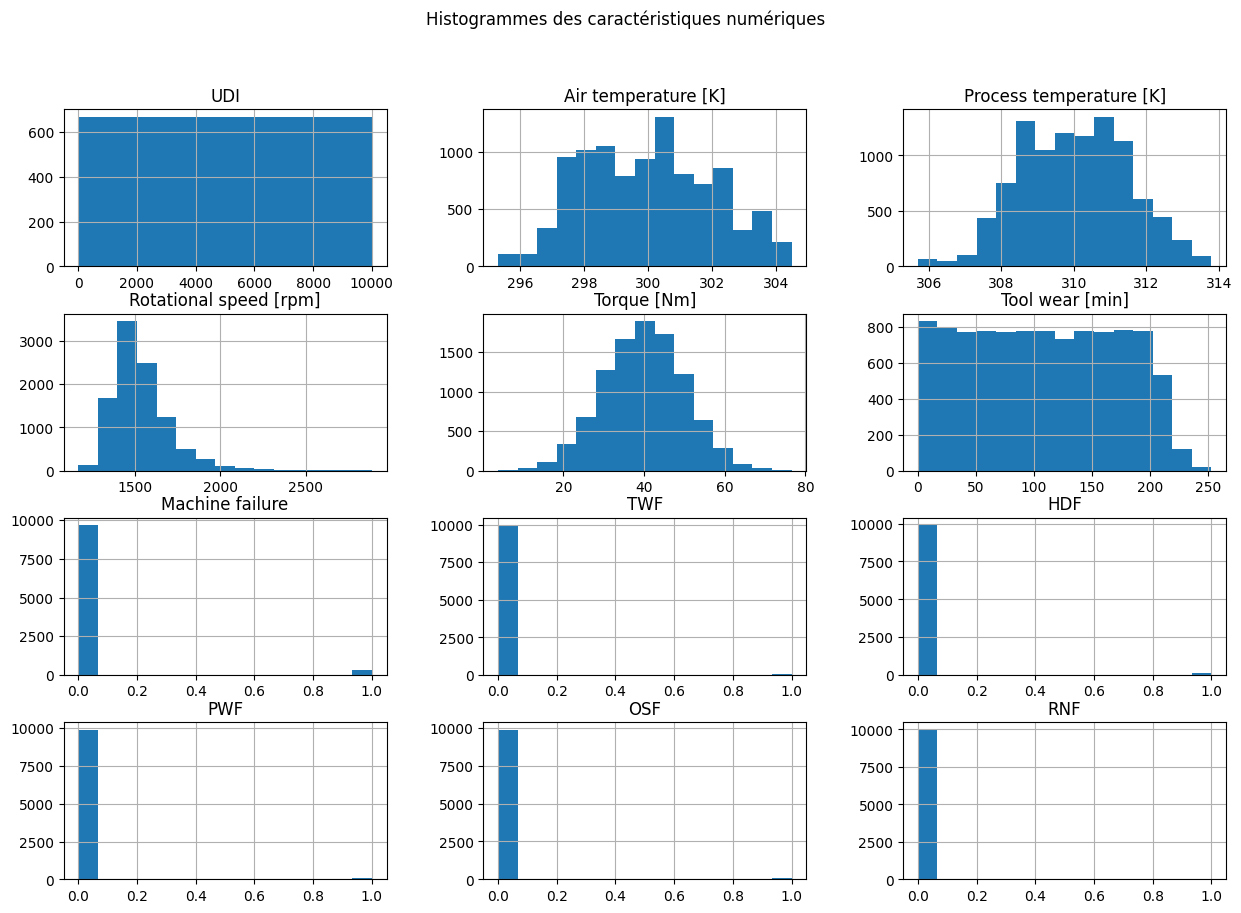

In [ ]:
# Histogramme pour les caractéristiques numériques
donnees.hist(bins=15, figsize=(15, 10))
plt.suptitle("Histogrammes des caractéristiques numériques")
plt.show()

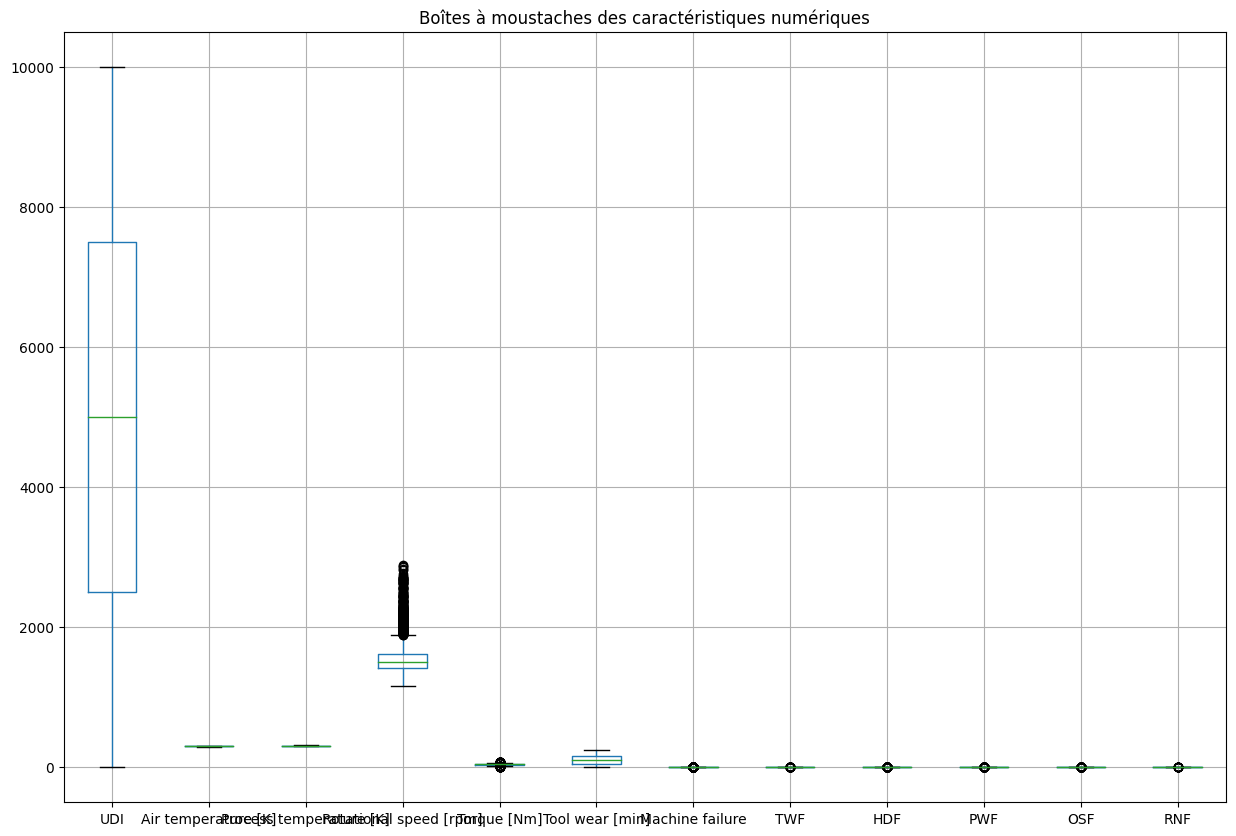

In [ ]:
# Boîtes à moustaches pour les caractéristiques numériques pour détecter les anomalies
plt.figure(figsize=(15, 10))
donnees.boxplot()
plt.title("Boîtes à moustaches des caractéristiques numériques")
plt.show()

<ipython-input-17-c47622ece22e>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(donnees.corr(), annot=True, cmap='coolwarm')


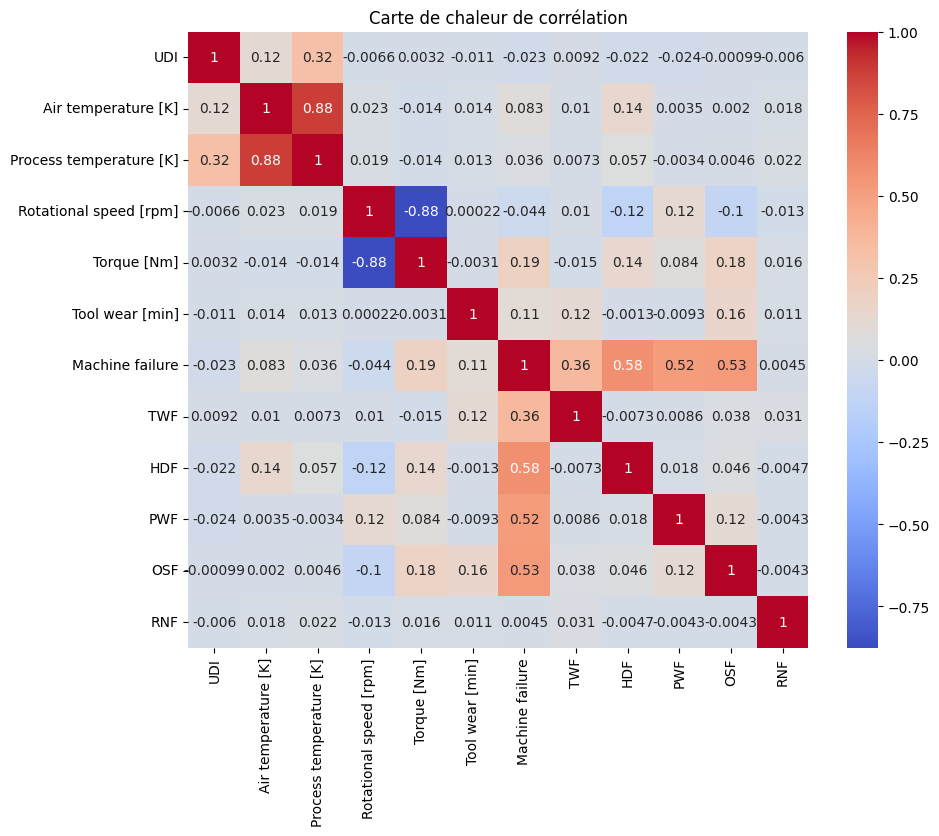

In [ ]:
# Carte de chaleur de corrélation
plt.figure(figsize=(10, 8))
sns.heatmap(donnees.corr(), annot=True, cmap='coolwarm')
plt.title("Carte de chaleur de corrélation")
plt.show()

Dans nos modèles on prend en considèration:

* Multicollinéarité : Éviter d'inclure des variables qui sont fortement corrélées entre elles (si deux variables ont une corrélation proche de 1 ou -1)

* Corrélation avec la Variable Cible : Les variables qui ont une corrélation plus élevée avec la variable cible sont: Machine failure, TWF, HDF, PWF, OSF, et RNF.

##**Data Preprocessing:**

**Traitement des outliers**

Car des caractéristiques comme 'air temperature [K]' ou 'rotational speed [rpm]' pourraient avoir des outliers

In [ ]:
Q1 = donnees.quantile(0.25)
Q3 = donnees.quantile(0.75)
IQR = Q3 - Q1

donnees = donnees[~((donnees < (Q1 - 1.5 * IQR)) |(donnees > (Q3 + 1.5 * IQR))).any(axis=1)]

<ipython-input-25-66ec982cf503>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = donnees.quantile(0.25)
<ipython-input-25-66ec982cf503>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = donnees.quantile(0.75)
<ipython-input-25-66ec982cf503>:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  donnees = donnees[~((donnees < (Q1 - 1.5 * IQR)) |(donnees > (Q3 + 1.5 * IQR))).any(axis=1)]


**Enlevé la colonnes "Product ID"**

In [ ]:
donnees = donnees.drop(columns=['Product ID'])

##**Développement des Modèles**

**Arbre de décision**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Préparation des données
X = donnees.drop(columns=['Machine failure'])
y = donnees['Machine failure']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Création du modèle
arbre_decision = DecisionTreeClassifier(random_state=42)

# Entraînement du modèle
arbre_decision.fit(X_train, y_train)

# Évaluation du modèle
score_arbre_decision = arbre_decision.score(X_test, y_test)
print("Score de l'arbre de décision :", score_arbre_decision)


ValueError: ignored